functions:
rf application:  
    
    rf fitting         func: to fit matching experimental and theoretical data. Calls match data function, ki_2 function          
    match data         func: Finds where experimental and theoretical data matches.     
      
    non match data     func: Finds all nucleons with theoretical values but not experimental    
    
    rf.predict train   func: predict ml component for train  
    
    rf.predict test    func: predict ml component for test  
    
    rf.predict all mat func: predict ml component for all matching data set  
    
    rf.predict non mat func: predict ml component for all non matching data set  
    
    ki_2               func: Finds the ki square of the the training, testing, matching data sets with and without ml component.
    
    
    

variance examination:
    Variance func: call rf_fitting
    call rf fitting func with 
mean/median/std func: find the mean/median/std of the matching and the non matching data set Seperatly.



In [ ]:
def train_test_split(rf_v, f_A, f_B):
    #passing all experimental and theoretical data sets to the method
    #feat_A and feat_B shall coresspond to the coloumn in X that the rf is trained on
    
    
    rf_v=RandomForestRegressor(n_estimators=1000)
    
    
    
    print(rf_v.predict(data))
           #, y_mat_exp, y_mat_the, y_nomat_the, y_exp, y_the):
    

In [ ]:
def match_data(exper, theor):
    
    
    
    


In [ ]:
#MAIN


mat_nuc=the_match_data(exper, theor) #List of Z,N pairs that have BOTH EXP and THE

for i in range(0, len(mat_nuc)):
    diff_mat                         = y_exp_d[mat_nuc[0],mat_nuc[1]] - y_the_d[mat_nuc[0],mat_nuc[1]] #list of mat diff
    
    diff_mat_d[mat_nuc[0],mat_nuc[1]]= y_exp_d[mat_nuc[0],mat_nuc[1]] - y_the_d[mat_nuc[0],mat_nuc[1]] #dictionary of mat diff

    
rf_application()

    
    

# CLEANING UP

In [6]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize

In [7]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

# INPUTING EXPERIMENTAL and THEORETICAL

In [13]:
#importing from experimental file
# Num Nuc  A   N   Z        E        E/A     dE     Eval    S1n     dS1n  Eval    
# 0   1    2   3   4        5        6       7      8       9       10    11
#S1p     dS1p  Eval    S2n     dS2n  Eval    S2p     dS2p  Eval
#12      13    14      15      16    17      18      19    20
N_exp    = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=3, skip_header=350) #Number of neutrons
Z_exp    = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=4, skip_header=350) #Number of protons
A_exp    = N_exp+Z_exp                                                        #Total number of Nucleons
# Difference between the experimental binding energy and the Liquid drop model
y_exp    = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=5, skip_header=350)

S_p_exp  = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=12, skip_header=350)
S_2p_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=18, skip_header=350)

S_n_exp  =-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=9, skip_header=350)
S_2n_exp =-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=15, skip_header=350)


#SKMS importing relevent data
#Symbol Z  N A Binding_Energy_(MeV)  S_p_(MeV)  S_{2p}_(MeV) S_n_(MeV)  S_{2n}_(MeV) Q_{alpha}_(MeV)       
#0      1  2 3 4                     5          6            7          8            9
Z_SKMS    = np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=1, skip_header=347) #Number of protons
N_SKMS    = np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=2, skip_header=347) #Number of neutrons
A_SKMS    = N_SKMS+Z_SKMS                                                       #Total number of Nucleons

y_SKMS    = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=4, skip_header=347)
Q_SKMS    = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=9, skip_header=347)

S_p_SKMS  = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=5, skip_header=347)
S_2p_SKMS = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=6, skip_header=347)

S_n_SKMS  = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=7, skip_header=347)
S_2n_SKMS = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=8, skip_header=347)

#END OF DATA INPUT


ZN_exp   = np.transpose(np.stack((Z_exp,N_exp)))
ZN_SKMS  = np.transpose(np.stack((Z_SKMS,N_SKMS)))


X_exp       = np.transpose(np.stack((Z_exp,   N_exp,   A_exp,   y_exp,   S_p_exp,   S_n_exp,   S_2p_exp,   S_2n_exp)))
X_SKMS      = np.transpose(np.stack((Z_SKMS,  N_SKMS,  A_SKMS,  y_SKMS,  S_p_SKMS,  S_n_SKMS<  S_2p_SKMS,  S_2n_SKMS)))




y_exp_d     ={}

S_n_exp_d   ={}
S_2n_exp_d  ={}

S_p_exp_d   ={}
S_2p_exp_d  ={}


for i in range(0,len(N_exp)):
    y_exp_d[     Z_exp[i],   N_exp[i]]=  y_exp[i]
    
    S_n_exp_d[   Z_exp[i],   N_exp[i]]=  S_n_exp[i]
    S_2n_exp_d[  Z_exp[i],   N_exp[i]]=  S_2n_exp[i]
    
    S_p_exp_d[   Z_exp[i],   N_exp[i]]=  S_p_exp[i]
    S_2p_exp_d[  Z_exp[i],   N_exp[i]]=  S_2p_exp[i]

    

y_SKMS_d    ={}

S_n_SKMS_d  ={}
S_2n_SKMS_d ={}

S_p_SKMS_d  ={}
S_2p_SKMS_d ={}

Q_SKMS_d    ={}

for i in range(0,len(X_SKMS)):
    y_SKMS_d[    Z_SKMS[i], N_SKMS[i]]=y_SKMS[i]
    
    S_n_SKMS_d[  Z_SKMS[i], N_SKMS[i]]=S_n_SKMS[i]
    S_2n_SKMS_d[ Z_SKMS[i], N_SKMS[i]]=S_2n_SKMS[i]
    
    S_p_SKMS_d[  Z_SKMS[i], N_SKMS[i]]=S_p_SKMS[i]
    S_2p_SKMS_d[ Z_SKMS[i], N_SKMS[i]]=S_2p_SKMS[i]
    
    Q_SKMS_d[    Z_SKMS[i], N_SKMS[i]]=Q_SKMS[i]
    


# FINDING MATCHING DATA SET

In [ ]:
Z_mat        =[]
N_mat        =[]

y_matexp     =[]
y_matexp_d   ={}

y_matSKMS    =[]
y_matSKMS_d  ={}

#Q_matexp     =[] #No Q exp values
#Q_matexp_d   ={}

Q_matSKMS    =[]
Q_matSKMS_d  ={}

diff_mat     =[]
diff_mat_d   ={}

Q_matexp     =[]
Q_matexp_d   ={}

Q_matSKMS    =[]
Q_matSKMS_d  ={}

#IMPROVING
for n in range(0, len(N_exp)+1):
    for z in range(0, len(Z_exp)+1):
        try:
            #Checking that there is y_exp AND y_SKMS
            
            test    =y_exp_d[z,n]
            test    =y_SKMS_d[z,n]
            
            diff_mat.append(y_exp_d[z,n]-y_SKMS_d[z,n])
            
            #Q_matexp.append(Q_exp_d[z,n]) No Experimental Q Value
            Q_matSKMS.append(Q_SKMS_d[z,n])
            
            N_mat.append(n)
            Z_mat.append(z)
            
            diff_mat_d[z,n]    =y_exp_d[z,n]-y_SKMS_d[z,n]
            
            y_matexp.append(y_exp_d[z,n])
            y_matSKMS.append(y_SKMS_d[z,n])
            
            y_matexp_d[z,n]    =y_exp_d[z,n]
            y_matSKMS_d[z,n]   =y_SKMS_d[z,n]
            
            #Q_matexp_d[z,n]    =Q_exp_d[z,n] No Experimental Q Value
            Q_matSKMS.append(Q_SKMS_d[z,n])
            #Q_matSKMS_d[z,n]   =Q_SKMS_d[z,n]
            
            
        except KeyError:
            continue

In [74]:
Z_mat        =[]
N_mat        =[]

y_matexp     =[]
y_matexp_d   ={}

y_matSKMS    =[]
y_matSKMS_d  ={}

#Q_matexp     =[] #No Q exp values
#Q_matexp_d   ={}

Q_matSKMS    =[]
Q_matSKMS_d  ={}

diff_mat     =[]
diff_mat_d   ={}

for ZN_i in ZN_exp:
    try:
        #Checking that there is y_exp AND y_SKMS
        test    =y_exp_d[ZN_i[0],ZN_i[1]]
        test    =y_SKMS_d[ZN_i[0],ZN_i[1]]
        
        
        diff_mat.append(y_exp_d[ZN_i[0],ZN_i[1]]-y_SKMS_d[ZN_i[0],ZN_i[1]])
        Z_mat.append(ZN_i[0])
        N_mat.append(ZN_i[1])

        y_matexp.append(y_exp_d[ ZN_i[0],ZN_i[1] ])
        y_matexp_d[ZN_i[0],ZN_i[1]]    =y_exp_d[ZN_i[0],ZN_i[1]]
        
        y_matSKMS.append(y_SKMS_d[ ZN_i[0],ZN_i[1] ])
        y_matSKMS_d[ZN_i[0],ZN_i[1]]   =y_SKMS_d[ZN_i[0],ZN_i[1]]
        
        
        Q_matSKMS.append(Q_SKMS_d[ZN_i[0],ZN_i[1]])
        Q_matSKMS_d[ZN_i[0],ZN_i[1]]   =Q_SKMS_d[ZN_i[0],ZN_i[1]]
    except KeyError:
        continue
            
            

# FINDING NO MATCH DATA SET

In [100]:
N_nomat=[]
Z_nomat=[]


y_nomatSKMS=[]
Q_nomatSKMS=[]

S_n_nomat=[]
S_p_nomat=[]

for ZN_i in ZN_SKMS:
    try:
        test=y_exp_d[ZN_i[0], ZN_i[1]]
        
    except KeyError:        
        try:
            test=y_SKMS_d[ZN_i[0],ZN_i[1]]   #Testing that their is a theoretical value for this nucleon
                    
            Z_nomat.append(ZN_i[0])
            N_nomat.append(ZN_i[1])
                    
            y_nomatSKMS.append(y_SKMS_d[ZN_i[0],ZN_i[1]])
            Q_nomatSKMS.append(Q_SKMS_d[ZN_i[0],ZN_i[1]])
                    
            S_n_nomatSKMS.append(S_n_SKMS_d[ZN_i[0],ZN_i[1]])
            S_p_nomatSKMS.append(S_p_SKMS_d[ZN_i[0],ZN_i[1]])
            
        except KeyError:
            continue
            
    continue
                
                    
ZN_mat=np.transpose(np.stack((Z_mat,N_mat)))                         
ZN_nomat=np.transpose(np.stack((Z_nomat,N_nomat)))     
                    
print(np.shape(ZN_mat))
print(np.shape(ZN_nomat))
print(ZN_mat[0])
print(ZN_nomat[0])

(2968, 2)
(5385, 2)
[20. 14.]
[20. 39.]


# Checking Shapes

In [99]:
               
print("n exp shape", np.shape(N_exp))
print("z exp shape", np.shape(Z_exp))
print("y exp shape", np.shape(y_exp), "\n")

print("n SKMS shape", np.shape(N_SKMS))
print("z SKMS shape", np.shape(Z_SKMS))
print("y SKMS shape", np.shape(y_SKMS))
print("Q SKMS shape", np.shape(Q_SKMS), "\n")


print("n mat shape", np.shape(N_mat))
print("z mat shape", np.shape(Z_mat))
print("y mat exp  shape", np.shape(y_matexp))
print("y mat SKMS shape", np.shape(y_matSKMS))
print("Q mat SKMS shape", np.shape(Q_matSKMS), "\n")



print("n nomat shape", np.shape(N_nomat))
print("z nomat shape", np.shape(Z_nomat))
print("y nomat SKMS shape", np.shape(y_nomatSKMS))
print("Q_nomatSKMS", np.shape(Q_nomatSKMS), "\n")


n exp shape (3083,)
z exp shape (3083,)
y exp shape (3083,) 

n SKMS shape (8353,)
z SKMS shape (8353,)
y SKMS shape (8353,)
Q SKMS shape (8353,) 

n mat shape (2968,)
z mat shape (2968,)
y mat exp  shape (2968,)
y mat SKMS shape (2968,)
Q mat SKMS shape (2968,) 

n nomat shape (5385,)
z nomat shape (5385,)
y nomat SKMS shape (5385,)
Q_nomatSKMS (5385,) 



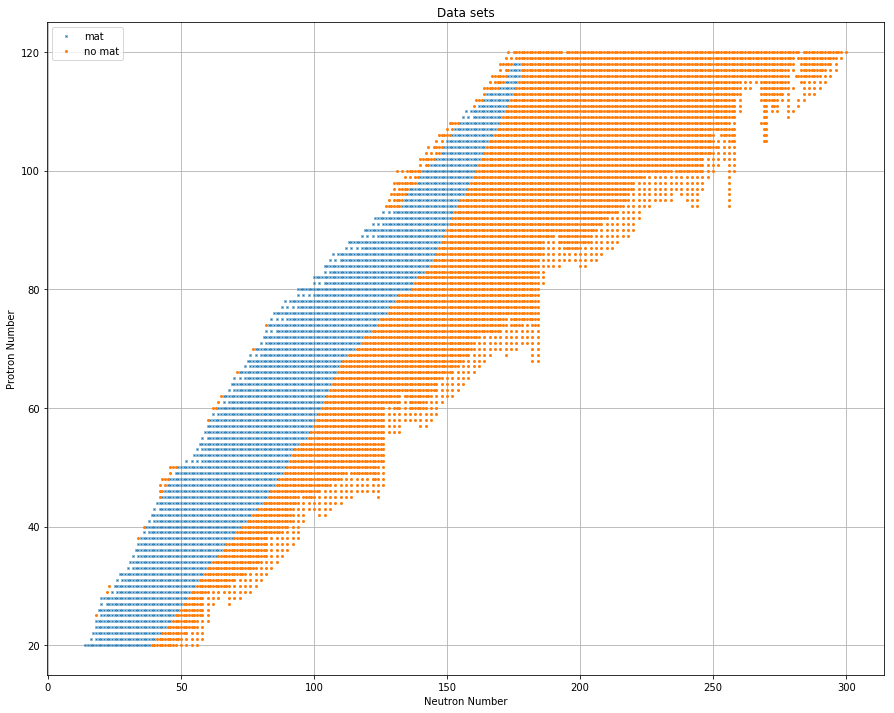

In [101]:
plt.title('Data sets')
plt.plot(N_mat, Z_mat,  'x', markersize=2, label='mat')
#plt.plot(N_exp, Z_exp,  'x', markersize=2, label='exp')
#plt.plot(N_SKMS, Z_SKMS, 'x', markersize=2, label='SKMS')
plt.plot(N_nomatSKMS,  Z_nomatSKMS, 'o', markersize=2, label='no mat')
#plt.plot(N_mat,Z_mat,'o', markersize=2)
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.legend()
plt.grid(True)
plt.show()

         

# random forest feature sets

## ZN

In [34]:
ZN_mat=np.transpose(np.stack((Z_mat,N_mat)))
ZN_mat=np.array(ZN_mat)

ZN_nomat=np.transpose(np.stack((Z_nomat,N_nomat)))
ZN_nomat=np.array(ZN_nomat)

ZN_SKMS=np.transpose(np.stack((Z_SKMS,N_SKMS)))
ZN_SKMS=np.array(ZN_SKMS)


print("ZN_mat shape:", np.shape(ZN_mat))
print("diff mat:", np.shape(diff_mat), "\n")


print("ZN_nomat shape:", np.shape(ZN_nomat))
print("ZN_SKMS  shape:", np.shape(ZN_SKMS), "\n")

ZN_train, ZN_test, y_ZN_train, y_ZN_test = train_test_split(ZN_mat, diff_mat, test_size =0.25, random_state=42 )

print("ZN_train", np.shape(ZN_train))
print("ZN_test", np.shape(ZN_test  ))


ZN_mat shape: (2968, 2)
diff mat: (2968,) 

ZN_nomat shape: (5385, 2)
ZN_SKMS  shape: (8353, 2) 

ZN_train (2226, 2)
ZN_test (742, 2)


## ZQ

In [104]:
print(np.shape(Z_mat))
print(np.shape(Q_matSKMS))


ZQ_mat=np.transpose(np.stack((Z_mat,Q_matSKMS)))
ZQ_mat=np.array(ZQ_mat)

ZQ_nomat=np.transpose(np.stack((Z_nomat,Q_nomatSKMS)))
ZQ_nomat=np.array(ZQ_nomat)

ZQ_SKMS=np.transpose(np.stack((Z_SKMS,Q_SKMS)))
ZQ_SKMS=np.array(ZQ_SKMS)

print("ZQ_mat shape:", np.shape(ZQ_mat))
print("diff mat:", np.shape(diff_mat), "\n")


print("ZQ_nomat shape:", np.shape(ZQ_nomat))
print("ZQ_SKMS  shape:", np.shape(ZQ_SKMS), "\n")

ZQ_train, ZQ_test, y_ZQ_train, y_ZQ_test = train_test_split(ZQ_mat, diff_mat, test_size =0.25, random_state=42 )

print("ZQ_train", np.shape(ZQ_train))
print("ZQ_test", np.shape(ZQ_test  ))


(2968,)
(2968,)
ZQ_mat shape: (2968, 2)
diff mat: (2968,) 

ZQ_nomat shape: (5385, 2)
ZQ_SKMS  shape: (8353, 2) 

ZQ_train (2226, 2)
ZQ_test (742, 2)


## NQ

In [105]:
print(np.shape(N_mat))
print(np.shape(Q_matSKMS))


NQ_mat=np.transpose(np.stack((N_mat,Q_matSKMS)))
NQ_mat=np.array(NQ_mat)

NQ_nomat=np.transpose(np.stack((N_nomat,Q_nomatSKMS)))
NQ_nomat=np.array(NQ_nomat)

NQ_SKMS=np.transpose(np.stack((N_SKMS,Q_SKMS)))
NQ_SKMS=np.array(NQ_SKMS)

print("NQ_mat shape:", np.shape(NQ_mat))
print("diff mat:", np.shape(diff_mat), "\n")


print("NQ_nomat shape:", np.shape(NQ_nomat))
print("NQ_SKMS  shape:", np.shape(NQ_SKMS), "\n")

NQ_train, NQ_test, y_NQ_train, y_NQ_test = train_test_split(NQ_mat, diff_mat, test_size =0.25, random_state=42 )

print("NQ_train", np.shape(NQ_train))
print("NQ_test", np.shape(NQ_test  ))


(2968,)
(2968,)
NQ_mat shape: (2968, 2)
diff mat: (2968,) 

NQ_nomat shape: (5385, 2)
NQ_SKMS  shape: (8353, 2) 

NQ_train (2226, 2)
NQ_test (742, 2)


## NZQ